In [1]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm 

In [116]:
housing = pd.read_csv('train.csv', index_col=0)
housing.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'Wo

In [125]:
housing['PoolQC']

Id
1       NaN
2       NaN
3       NaN
4       NaN
5       NaN
       ... 
1456    NaN
1457    NaN
1458    NaN
1459    NaN
1460    NaN
Name: PoolQC, Length: 1460, dtype: object

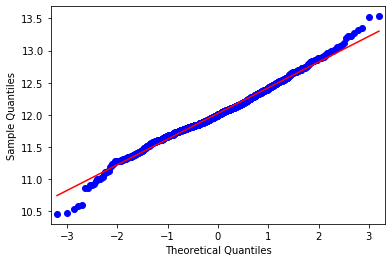

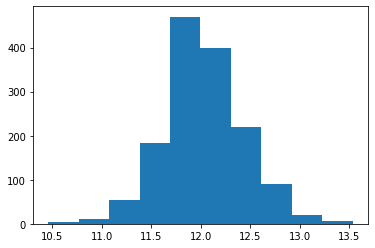

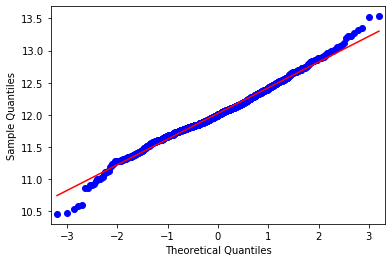

In [4]:
plt.hist(np.log(housing['SalePrice']))
sm.qqplot(np.log(housing['SalePrice']), line='s')

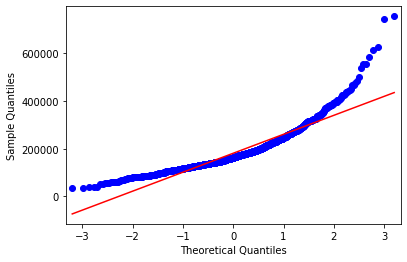

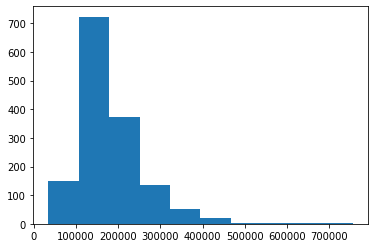

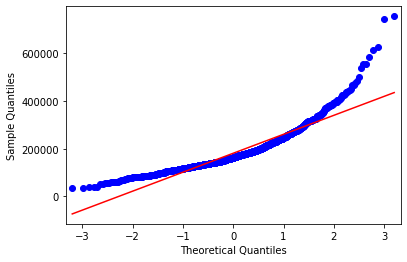

In [7]:
plt.hist(housing['SalePrice'])
sm.qqplot(housing['SalePrice'], line='s')

<BarContainer object of 19 artists>

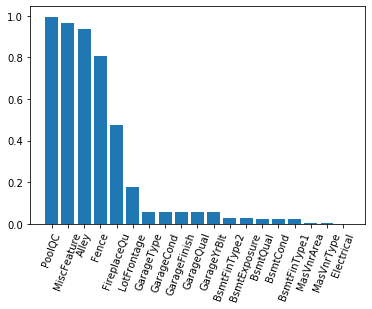

In [117]:
null_val_perc = housing.isnull().mean().sort_values(ascending=False)
null_val_perc = null_val_perc[null_val_perc > 0]
plt.xticks(rotation='70')
plt.bar(x=null_val_perc.index, height=null_val_perc)


In [132]:
null_val_perc.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageType', 'GarageCond', 'GarageFinish', 'GarageQual', 'GarageYrBlt',
       'BsmtFinType2', 'BsmtExposure', 'BsmtQual', 'BsmtCond', 'BsmtFinType1',
       'MasVnrArea', 'MasVnrType', 'Electrical'],
      dtype='object')

Id
1       2003.0
2       1976.0
3       2001.0
4       1998.0
5       2000.0
         ...  
1456    1999.0
1457    1978.0
1458    1941.0
1459    1950.0
1460    1965.0
Name: GarageYrBlt, Length: 1460, dtype: object

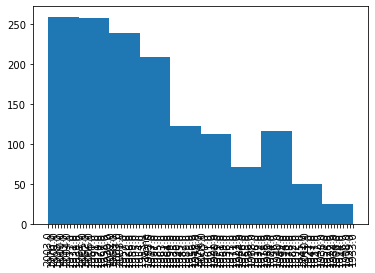

In [172]:
housing['GarageYrBlt'] = housing['GarageYrBlt'].astype(str)
housing['GarageYrBlt'] = housing['GarageYrBlt'].fillna('None')
plt.hist(housing['GarageYrBlt'])
plt.xticks(rotation='90')

housing['GarageYrBlt']

Id
1       196.0
2         0.0
3       162.0
4         0.0
5       350.0
        ...  
1456      0.0
1457    119.0
1458      0.0
1459      0.0
1460      0.0
Name: MasVnrArea, Length: 1460, dtype: float64

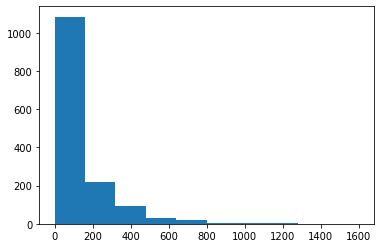

In [188]:
housing['MasVnrArea'] = housing['MasVnrArea'].fillna(0)
plt.hist(housing['MasVnrArea'])
housing['MasVnrArea']


Id
1       Unf
2       Unf
3       Unf
4       Unf
5       Unf
       ... 
1456    Unf
1457    Rec
1458    Unf
1459    Rec
1460    LwQ
Name: BsmtFinType2, Length: 1460, dtype: object

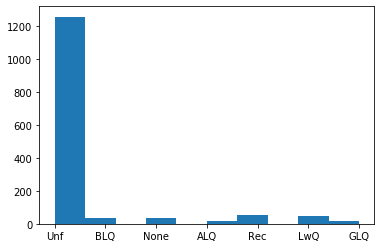

In [200]:
housing['BsmtFinType2'] = housing['BsmtFinType2'].fillna('None')
plt.hist(housing['BsmtFinType2'])
housing['BsmtFinType2']

In [201]:
housing.isnull().mean().sort_values(ascending=False)

SalePrice        0.0
SaleCondition    0.0
RoofMatl         0.0
Exterior1st      0.0
Exterior2nd      0.0
                ... 
Functional       0.0
Fireplaces       0.0
FireplaceQu      0.0
GarageType       0.0
MSSubClass       0.0
Length: 80, dtype: float64

In [17]:
zero_cols = housing.loc[:, (housing == 0).any()].columns.to_list()
zero_cols

['MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'Fireplaces',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal']

(array([1.077e+03, 2.190e+02, 9.400e+01, 2.900e+01, 1.900e+01, 6.000e+00,
        4.000e+00, 2.000e+00, 1.000e+00, 1.000e+00]),
 array([   0.,  160.,  320.,  480.,  640.,  800.,  960., 1120., 1280.,
        1440., 1600.]),
 <a list of 10 Patch objects>)

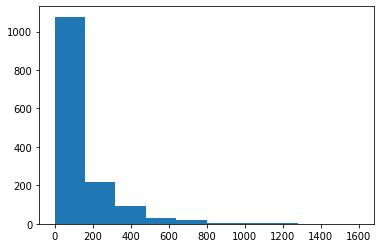

In [98]:
plt.hist(housing['MasVnrArea'])

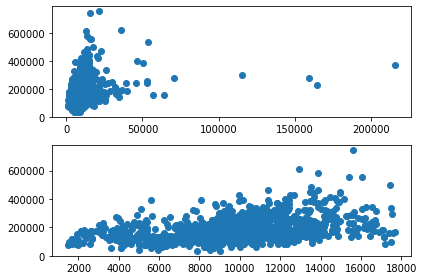

In [10]:
lot_area_Q1 = housing['LotArea'].quantile(.25)
lot_area_Q3 = housing['LotArea'].quantile(.75)
lot_area_IQR = lot_area_Q3 - lot_area_Q1
lot_area_lower_bound = lot_area_Q1 - 1.5 * lot_area_IQR
lot_area_upper_bound = lot_area_Q3 + 1.5 * lot_area_IQR
lot_area_no_outlier = housing.loc[(housing['LotArea'] > lot_area_lower_bound) & (housing['LotArea'] < lot_area_upper_bound)]

fig, ax = plt.subplots(2,1, figsize=(6,4))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(x=housing['LotArea'], y=housing['SalePrice'])
ax2.scatter(x=lot_area_no_outlier['LotArea'], y=lot_area_no_outlier['SalePrice'])
plt.tight_layout()

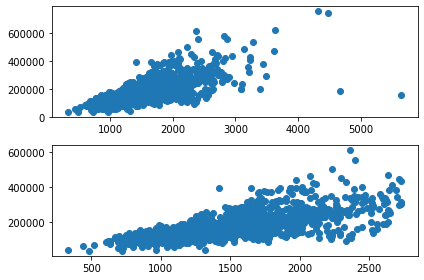

In [15]:
grlivarea_Q1 = housing['GrLivArea'].quantile(.25)
grlivarea_Q3 = housing['GrLivArea'].quantile(.75)
grlivarea_IQR = grlivarea_Q3 - grlivarea_Q1
grlivarea_lower_bound = grlivarea_Q1 - 1.5 * grlivarea_IQR
grlivarea_upper_bound = grlivarea_Q3 + 1.5 * grlivarea_IQR
grlivarea_no_outlier = housing.loc[(housing['GrLivArea'] > grlivarea_lower_bound) & (housing['GrLivArea'] < grlivarea_upper_bound)]

fig, ax = plt.subplots(2,1, figsize=(6,4))
ax1 = ax[0]
ax2 = ax[1]
ax1.scatter(x=housing['GrLivArea'], y=housing['SalePrice'])
ax2.scatter(x=grlivarea_no_outlier['GrLivArea'], y=grlivarea_no_outlier['SalePrice'])
plt.tight_layout()

In [206]:
sale_price = housing['SalePrice']
housing_copy = housing
housing_copy = housing_copy.drop('SalePrice',axis=1)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
Id,,,,,,,,,,,,,,,,,,,,,
1,60,RL,65.0,8450,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,2,2008,WD,Normal
2,20,RL,80.0,9600,Pave,None,Reg,Lvl,AllPub,FR2,...,0,0,None,None,None,0,5,2007,WD,Normal
3,60,RL,68.0,11250,Pave,None,IR1,Lvl,AllPub,Inside,...,0,0,None,None,None,0,9,2008,WD,Normal
4,70,RL,60.0,9550,Pave,None,IR1,Lvl,AllPub,Corner,...,0,0,None,None,None,0,2,2006,WD,Abnorml
5,60,RL,84.0,14260,Pave,None,IR1,Lvl,AllPub,FR2,...,0,0,None,None,None,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,60,RL,62.0,7917,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,None,None,0,8,2007,WD,Normal
1457,20,RL,85.0,13175,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,MnPrv,None,0,2,2010,WD,Normal
1458,70,RL,66.0,9042,Pave,None,Reg,Lvl,AllPub,Inside,...,0,0,None,GdPrv,Shed,2500,5,2010,WD,Normal


In [208]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
ridge = Ridge()
lasso = Lasso()
net   = ElasticNet()

In [220]:
housing_copy.select_dtypes(include =['int64', 'float64'])
num_housing = housing_copy.select_dtypes(include =['int64', 'float64'])
ridge.fit(num_housing, sale_price)
print('the ridge intercept is: %.2f' %(ridge.intercept_))
pd.Series(ridge.coef_, index=num_housing.columns)

the ridge intercept is: 520569.07


MSSubClass        -180.203720
LotFrontage        -60.379045
LotArea              0.424687
OverallQual      17400.108953
OverallCond       4405.775038
YearBuilt          323.418932
YearRemodAdd       169.873464
MasVnrArea          31.340141
BsmtFinSF1          10.042694
BsmtFinSF2          -1.203626
BsmtUnfSF            0.250277
TotalBsmtSF          9.089351
1stFlrSF            16.385805
2ndFlrSF            16.586894
LowQualFinSF        -0.918826
GrLivArea           32.053890
BsmtFullBath      9264.046856
BsmtHalfBath      1706.544843
FullBath          3913.556200
HalfBath         -1812.502998
BedroomAbvGr    -10221.706993
KitchenAbvGr    -11824.855287
TotRmsAbvGrd      5103.535072
Fireplaces        3627.145538
GarageCars       10560.557950
GarageArea          -0.444314
WoodDeckSF          25.171744
OpenPorchSF         -1.071941
EnclosedPorch       11.782493
3SsnPorch           20.388032
ScreenPorch         55.299099
PoolArea           -30.386999
MiscVal             -0.740739
MoSold    